<div style="text-align: right"> Tommy Evans-Barton </div>
<div style="text-align: right"> WR Year 2 Jumps </div>

# EDA of Wide Receiver Data Pre-Cleaning

The purpose of this notebook is to do a technical analysis of the **raw** data that will be used in the main report, along with some justifications for future cleaning approaches. Most of this work will be academic and mainly to perform due diligence, and only useful for deeper dives into the work of this project. Data courtesy of Pro Football Reference and Football Outsiders.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
TOP_PATH = os.environ['PWD']

In [4]:
sys.path.append(TOP_PATH + '/src')
sys.path.append(TOP_PATH + '/src/viz')

In [5]:
import eda_viz_pre

In [6]:
receivers = pd.read_csv(TOP_PATH + '/data/raw/RECEIVERS.csv')
rec_stats = pd.read_csv(TOP_PATH + '/data/raw/REC_STATS.csv')
adv_stats = pd.read_csv(TOP_PATH + '/data/raw/ADV_REC_STATS.csv')

## Receivers Drafted Data
This data is being used in order to isolate the receivers drafted in the first three rounds from 2010 to 2019, as well as identify which years are their first and second in the league.

In [7]:
receivers.head()

,Rnd,Pick,Tm,Player,Pos,Age,YEAR
0,1,3,CLE,Braylon Edwards,WR,22,2005
1,1,7,MIN,Troy Williamson,WR,22,2005
2,1,10,DET,Mike Williams,WR,21,2005
3,1,21,JAX,Matt Jones,WR,22,2005
4,1,22,BAL,Mark Clayton,WR,23,2005


### Feature Types
Initially, it seems that the typing of the receivers data is fairly reasonable, as all numeric data are integers and all other data are strings.

In [8]:
receivers.dtypes

Rnd        int64
Pick       int64
Tm        object
Player    object
Pos       object
Age        int64
YEAR       int64
dtype: object

### Missingness
There seem to be no missing entries for this dataset, which is in line with initial assumptions.

In [9]:
receivers.isnull().mean()

Rnd       0.0
Pick      0.0
Tm        0.0
Player    0.0
Pos       0.0
Age       0.0
YEAR      0.0
dtype: float64

### Categoric Features

#### Team

This data seems to use a fairly standard 3 letter encoding of the teams, with all teams accounted for, including former franchises the St. Louis Rams and the San Diego Chargers, who will probably be combined into their L.A. counterparts.

In [10]:
receivers['Tm'].nunique()

34

In [11]:
receivers['Tm'].value_counts()

TEN    11
PIT    11
NYG     9
CIN     8
GNB     7
PHI     7
ARI     7
BUF     7
SFO     7
JAX     6
DET     6
HOU     6
SEA     6
BAL     6
MIA     6
CHI     6
CLE     6
CAR     6
DEN     6
KAN     5
ATL     5
NWE     5
MIN     5
TAM     5
STL     5
IND     5
WAS     5
SDG     4
NOR     4
OAK     3
NYJ     3
DAL     3
LAC     1
LAR     1
Name: Tm, dtype: int64

### Distribution of Numeric Features

#### Rounds
Over the three rounds, the number of receivers selected increases by round. However, there are more picks in the third round, due to compensatory selections, which will also affect the distribution of receivers by pick in the chart that follows this one.

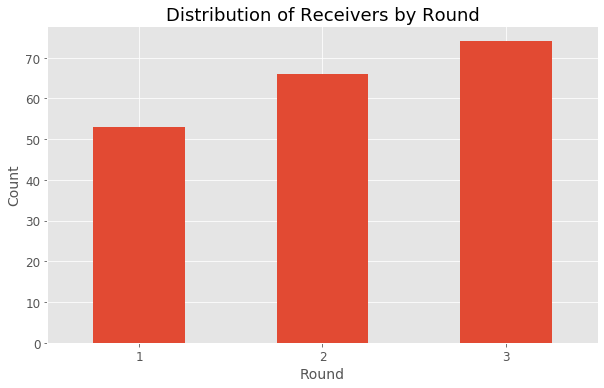

In [12]:
eda_viz_pre.round_distribution(savefig = True)

#### Picks
In terms of the distribution of receivers drafted by 10 picks, there is an odd dip in the middle of each round, i.e. around the 11th to 20th pick of each round with spikes at the beginning and end of rounds. However, while interesting in it's own right, this will not be have an effect on this analysis.

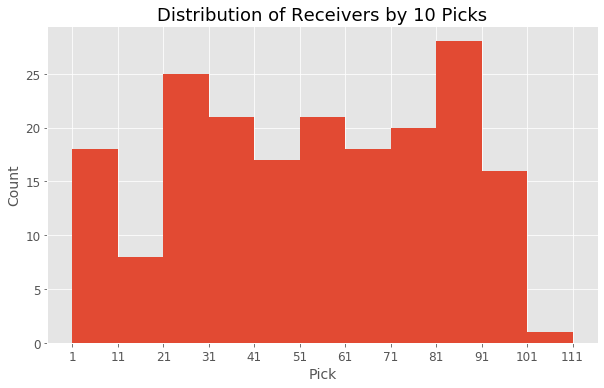

In [13]:
eda_viz_pre.pick_distribution(savefig = True)

#### Age
The distribution of the ages of the players is as expected: a fairly normal distribution with a peak at 22 years old, a fairly standard age to be finishing college at.

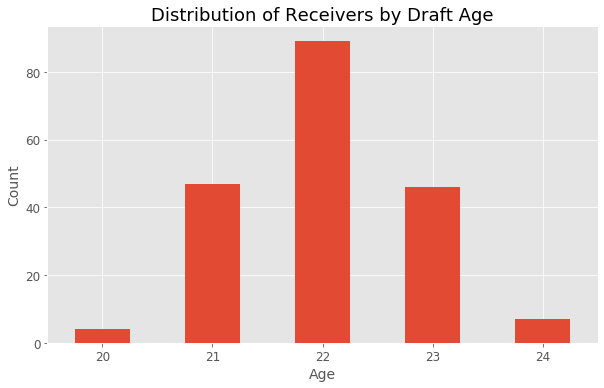

In [14]:
eda_viz_pre.age_distribution(savefig = True)

## Receiver Stats Data
These fairly standard statistics (courtesy of Pro Football Reference) for receivers will be used for the projections of second year jumps. They will need to be trimmed down to only the rookie and second year players for each year. (*Note:* a Glossary of this dataset's features is available in the reference section)

In [15]:
rec_stats.head()

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
0,Larry Fitzgerald*,ARI,22,WR,16,16,165.0,103,62.4%,1409,13.7,10,68,47,8.5,6.4,88.1,0,2005
1,Steve Smith*+,CAR,26,WR,16,16,150.0,103,68.7%,1563,15.2,12,72,80,10.4,6.4,97.7,2,2005
2,Anquan Boldin,ARI,25,WR,14,14,171.0,102,59.6%,1402,13.7,7,69,54,8.2,7.3,100.1,2,2005
3,Torry Holt*,STL,29,WR,14,14,163.0,102,62.6%,1331,13.0,9,63,44,8.2,7.3,95.1,2,2005
4,Chad Johnson *+,CIN,27,WR,16,16,155.0,97,62.6%,1432,14.8,9,74,70,9.2,6.1,89.5,1,2005


### Feature Types
For the typing of our features, while the `Catch Percentage` column is a string and will need to be converted to a float, the rest of the features are in the correct format for analysis. Additionally, on viewing the `Player Name` column, there will need to be some slight cleaning of extra characters.

In [16]:
rec_stats.dtypes

Player     object
Tm         object
Age         int64
Pos        object
G           int64
GS          int64
Tgt       float64
Rec         int64
Ctch%      object
Yds         int64
Y/R       float64
TD          int64
1D          int64
Lng         int64
Y/Tgt     float64
R/G       float64
Y/G       float64
Fmb         int64
YEAR        int64
dtype: object

### Missingness
The only column that has a substantial amount of missing variables is the Position column, and since we will later be merging on a list of only receivers, it won't matter. Certain target numbers are also missing, and therefore their yards per target are also missing. However, this only applies to three individuals, and shouldn't greatly affect the model.

In [17]:
rec_stats.isnull().mean()

Player    0.000000
Tm        0.000000
Age       0.000000
Pos       0.730041
G         0.000000
GS        0.000000
Tgt       0.000617
Rec       0.000000
Ctch%     0.000000
Yds       0.000000
Y/R       0.000000
TD        0.000000
1D        0.000000
Lng       0.000000
Y/Tgt     0.000617
R/G       0.000000
Y/G       0.000000
Fmb       0.000000
YEAR      0.000000
dtype: float64

In [18]:
rec_stats[rec_stats['Tgt'].isnull()]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
2052,Clyde Gates,MIA,25,NaN,15,0,NaN,2,0.0%,19,9.5,0,1,11,NaN,0.1,1.3,0,2011
3073,David Johnson,SDG,27,NaN,14,2,NaN,1,0.0%,4,4.0,0,0,4,NaN,0.1,0.3,0,2014
3084,Aldrick Robinson,2TM,26,NaN,7,0,NaN,1,0.0%,6,6.0,0,0,6,NaN,0.1,0.9,0,2014


### Categorical Features

#### Team
This data seems to use a similar 3 character encoding of the teams as described previously. When the team encodings in this dataset are compared to the drafted receivers dataset, it can be seen that they are the same, and therefore won't need to be changed, albeit the encodings for a player being on multiple teams will most likely need to be replaced with NaNs.

In [19]:
rec_stats['Tm'].nunique()

37

In [20]:
rec_stats['Tm'].value_counts()

2TM    215
JAX    161
SEA    159
GNB    157
ARI    156
TAM    155
IND    154
OAK    153
NYG    153
NYJ    152
DET    152
KAN    151
WAS    151
BUF    150
TEN    148
PIT    147
NOR    145
CIN    144
CLE    144
SFO    142
BAL    142
ATL    139
NWE    138
MIN    137
CHI    137
PHI    136
DEN    135
HOU    134
DAL    126
MIA    126
CAR    119
STL    112
SDG    107
LAR     41
LAC     28
3TM     13
4TM      1
Name: Tm, dtype: int64

In [21]:
set(receivers['Tm']) - set(rec_stats['Tm'])

set()

In [22]:
set(rec_stats['Tm']) - set(receivers['Tm'])

{'2TM', '3TM', '4TM'}

#### Position
Since every position in the receivers data is WR the nulls don't matter, and this column may just end up being dropped.

In [23]:
rec_stats['Pos'].value_counts(dropna = False)

NaN    3548
WR     1040
wr      272
Name: Pos, dtype: int64

### Distribution of Numeric Features

#### Games
Most players played in the majority of games, with very few playing in less than 2 games, probably due to an artifact of the recording (a player is less likely to have receiving stats recorded if they didn't play many games).

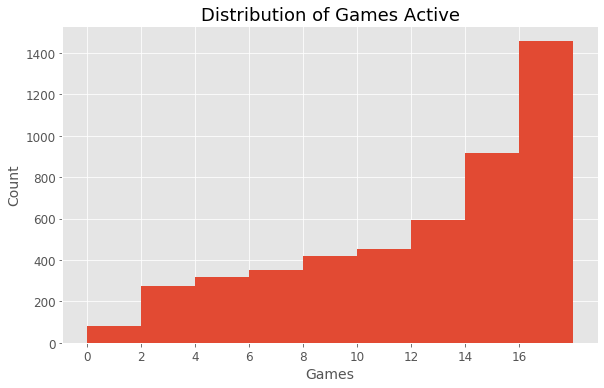

In [24]:
eda_viz_pre.game_distribution(savefig = True)

#### Games Started
Interestingly, while the Games feature is far more dense at the top of its range, the games started distribution seems to be a far more uniform distribution from 5 to 14, with an uptick again at 15. It also makes sense that the majority of players did not start a game.

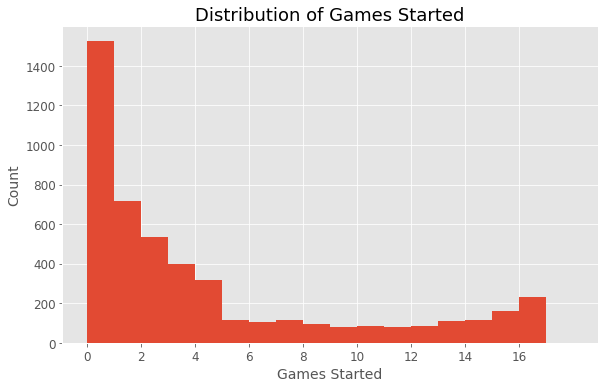

In [25]:
eda_viz_pre.gs_distribution(savefig = True)

#### Targets
Targets seems to be an inversely related distribution with a large spike in the 0-25 range, which makes sense as most players will not receive much playing time (i.e. snaps so their targets will be low). This distribution also has a very large outlier in the 200 range. Upon further investigation, there are 2 receivers who have ever put up 200 receptions in a single season (Calvin Johnson and Julio Jones), both of whom put up historical seasons in these years.

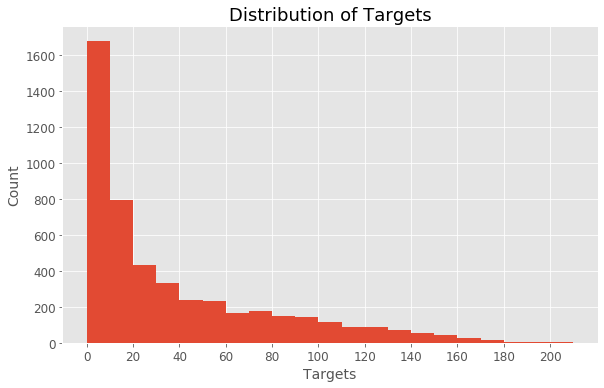

In [26]:
eda_viz_pre.tgt_distribution(savefig = True)

In [27]:
rec_stats[rec_stats['Tgt'] >= 200]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
2107,Calvin Johnson *+,DET,27,WR,16,16,204.0,122,59.8%,1964,16.1,5,92,53,9.6,7.6,122.8,3,2012
3093,Julio Jones *+,ATL,26,WR,16,16,203.0,136,67.0%,1871,13.8,8,93,70,9.2,8.5,116.9,3,2015


#### Receptions
The Receptions distribution has a very similar shape to the Targets which intuitively makes some sense. There is one rather large outlier, which has been a bit washed out by the size of the zero bin, and upon inspection that is Michael Thomas, who broke the record for receptions in a season in 2019.

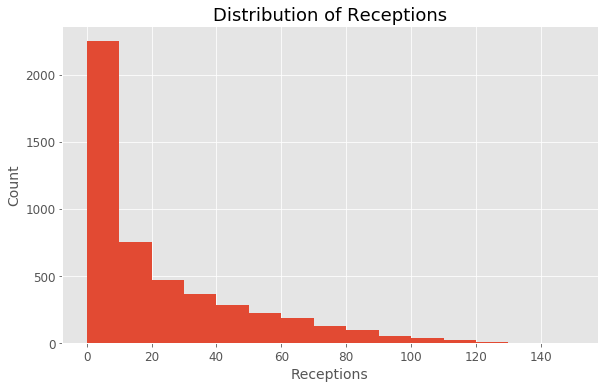

In [28]:
eda_viz_pre.rec_distribution(savefig = True)

In [29]:
rec_stats[rec_stats['Rec'] >= 140]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
4486,Michael Thomas*+,NOR,26,WR,16,15,185.0,149,80.5%,1725,11.6,9,91,49,9.3,9.3,107.8,1,2019


#### Catch Rate
The Catch Rate of each receiver has a fairly tight normal distribution, with a peak around 50%. There is also a very large spike in the range above 90%, and upon further investigation, while there are many individuals in this bin, almost none of them had significant target levels, and therefore their presence is fairly misrepresentative of the data as a whole. Those entries with catch rates lower than 10 percent are shown to be those players with out any targets listed, making these entries meaningless.

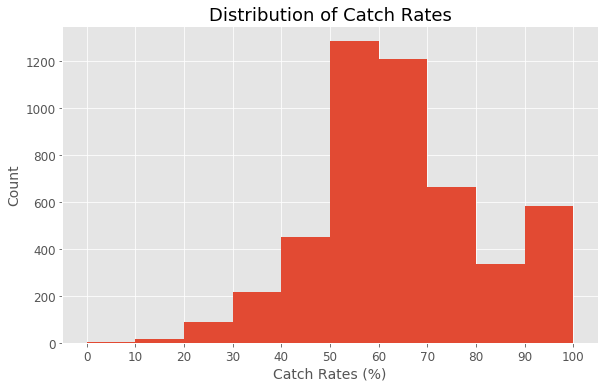

In [30]:
eda_viz_pre.ctr_distribution(savefig = True)

In [31]:
rec_stats[pd.to_numeric(rec_stats['Ctch%'].str.replace('%', '')) >= 90]['Tgt'].value_counts().sort_index()

1.0     284
2.0     118
3.0      57
4.0      26
5.0      16
6.0      24
7.0       8
8.0       7
9.0       2
10.0     14
11.0      6
12.0      1
13.0      6
14.0      1
16.0      2
17.0      1
20.0      2
21.0      2
23.0      2
24.0      2
26.0      1
29.0      1
36.0      1
39.0      1
Name: Tgt, dtype: int64

In [32]:
rec_stats[pd.to_numeric(rec_stats['Ctch%'].str.replace('%', '')) < 10]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
2052,Clyde Gates,MIA,25,NaN,15,0,NaN,2,0.0%,19,9.5,0,1,11,NaN,0.1,1.3,0,2011
3073,David Johnson,SDG,27,NaN,14,2,NaN,1,0.0%,4,4.0,0,0,4,NaN,0.1,0.3,0,2014
3084,Aldrick Robinson,2TM,26,NaN,7,0,NaN,1,0.0%,6,6.0,0,0,6,NaN,0.1,0.9,0,2014


#### Yards
The Yards distribution again follows the patterns of the Receptions and Targets distributions (this makes sense that they would be related). There are a few outliers (Calvin Johnson's and Julio Jones's seasons that were mentioned previously, as well as a very prolific Antonio Brown season), but none that need to be corrected or that will dramatically affect an analysis. Again most players, being non-starters, had low receiving yard numbers.

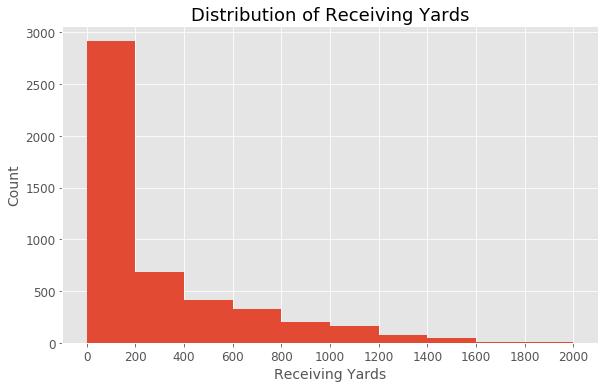

In [33]:
eda_viz_pre.yards_distribution(savefig = True)

In [34]:
rec_stats[rec_stats['Yds'] >= 1800]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
2107,Calvin Johnson *+,DET,27,WR,16,16,204.0,122,59.8%,1964,16.1,5,92,53,9.6,7.6,122.8,3,2012
3092,Antonio Brown *+,PIT,27,WR,16,16,193.0,136,70.5%,1834,13.5,10,84,59,9.5,8.5,114.6,3,2015
3093,Julio Jones *+,ATL,26,WR,16,16,203.0,136,67.0%,1871,13.8,8,93,70,9.2,8.5,116.9,3,2015


#### Yards per Reception
Yards per Reception displays a normal distribution with a peak in the 10-12 bin. On the upper end, while it may initially seem that there are many players with more than 20 yards per reception, many of these players only had about 1 to 4 receptions in an entire year, a similar issue as previously seen in the other rate statistics.

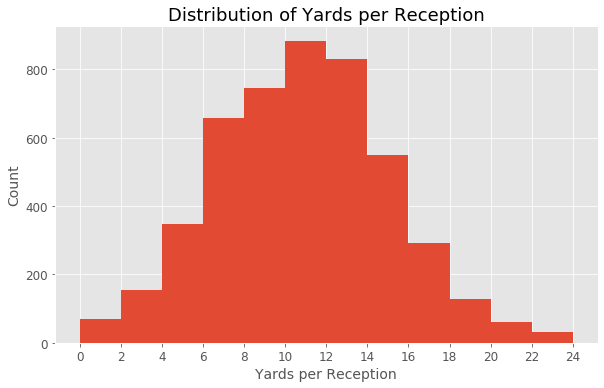

In [35]:
eda_viz_pre.ypr_distribution(savefig = True)

In [36]:
rec_stats[rec_stats['Y/R'] >= 20]['Rec'].value_counts().sort_index()

1     62
2     31
3     11
4     10
5      8
6      4
7      4
8      3
9      6
10     1
11     3
12     3
13     3
14     2
15     1
16     3
17     1
18     1
20     1
21     1
22     1
26     2
27     1
32     3
33     1
47     1
48     1
49     1
52     1
56     1
60     1
Name: Rec, dtype: int64

#### Touchdowns
Touchdowns has an inverse relationship, again due to the lower cap and presence of part-time players, with a peak at 0. The right tail makes sense, as there are very few stars putting up large touchdown numbers.

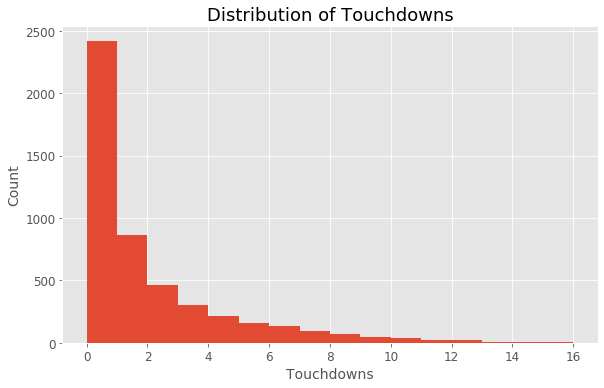

In [37]:
eda_viz_pre.td_distribution(savefig = True)

#### First Downs
First Downs again demonstrates an inverse distribution (peak at around 0-10), with similar reasoning to the other right skews. When looking at the outliers on the high side, each came from historical wide receiver seasons (Calvin Johnson, Julio Jones, Michael Thomas).

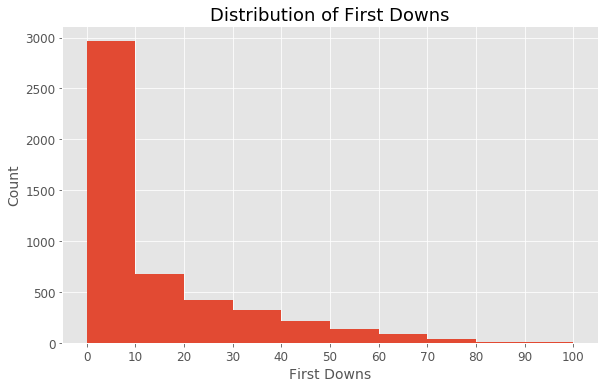

In [38]:
eda_viz_pre.fd_distribution(savefig = True)

In [39]:
rec_stats[rec_stats['1D'] >= 90]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
2107,Calvin Johnson *+,DET,27,WR,16,16,204.0,122,59.8%,1964,16.1,5,92,53,9.6,7.6,122.8,3,2012
3093,Julio Jones *+,ATL,26,WR,16,16,203.0,136,67.0%,1871,13.8,8,93,70,9.2,8.5,116.9,3,2015
4486,Michael Thomas*+,NOR,26,WR,16,15,185.0,149,80.5%,1725,11.6,9,91,49,9.3,9.3,107.8,1,2019


#### Long
The Long distribution is a normal one with a right skew, with a peak around 10-20.

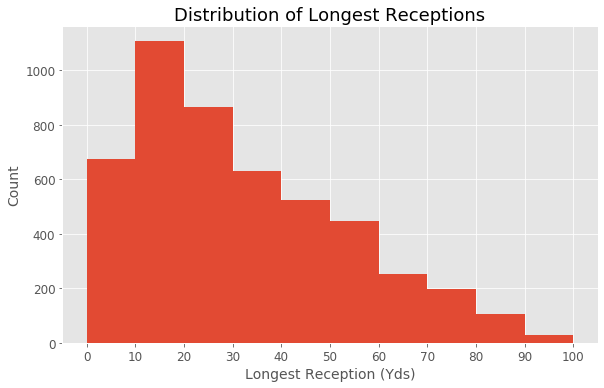

In [40]:
eda_viz_pre.long_distribution(savefig = True)

#### Yards per Target
Yards per Target displays a normal distribution centered around 6 with a right skew. However, when you look at the numbers out on the right tail, almost all of them have almost no receptions, showing that this tail is a bit misrepresentative of this data.

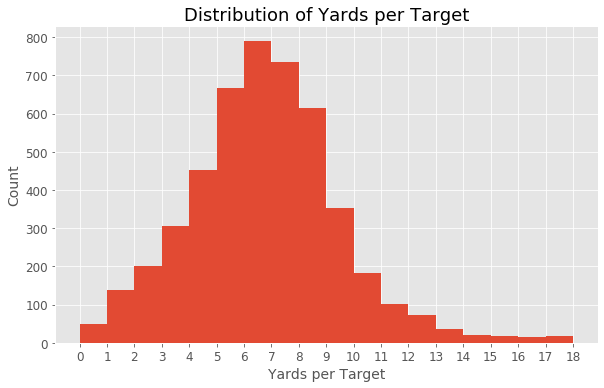

In [41]:
eda_viz_pre.ypt_distribution(savefig = True)

In [42]:
rec_stats[rec_stats['Y/Tgt'] >= 14]['Rec'].value_counts().sort_index()

1     68
2     27
3     12
4      4
5      4
6      3
7      4
8      2
9      4
10     1
12     1
13     1
32     1
Name: Rec, dtype: int64

#### Receptions per Game
Receptions per Game displays an inverse relationship with a few high outliers from players who had elite seasons (Michael Thomas, Wes Welker, Julio Jones, Antonio Brown, Keenan Allen). Most players did not have any receptions per game.

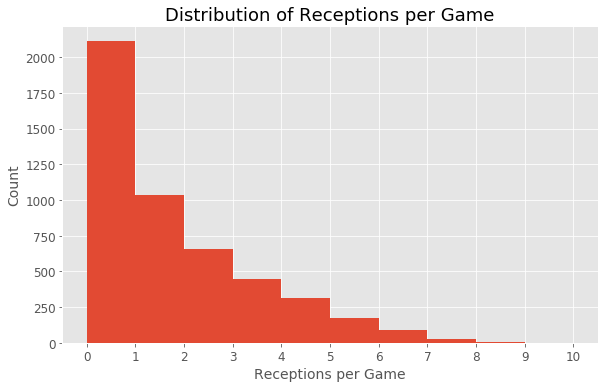

In [43]:
eda_viz_pre.rpg_distribution(savefig = True)

In [44]:
rec_stats[rec_stats['R/G'] >= 8]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
1187,Wes Welker*+,NWE,28,WR,14,13,162.0,123,75.9%,1348,11.0,4,71,58,8.3,8.8,96.3,2,2009
2504,Julio Jones,ATL,24,wr,5,5,59.0,41,69.5%,580,14.1,2,25,81,9.8,8.2,116.0,2,2013
2770,Antonio Brown *+,PIT,26,WR,16,16,181.0,129,71.3%,1698,13.2,13,87,63,9.4,8.1,106.1,2,2014
3092,Antonio Brown *+,PIT,27,WR,16,16,193.0,136,70.5%,1834,13.5,10,84,59,9.5,8.5,114.6,3,2015
3093,Julio Jones *+,ATL,26,WR,16,16,203.0,136,67.0%,1871,13.8,8,93,70,9.2,8.5,116.9,3,2015
3121,Keenan Allen,SDG,23,WR,8,8,89.0,67,75.3%,725,10.8,4,34,38,8.1,8.4,90.6,1,2015
4486,Michael Thomas*+,NOR,26,WR,16,15,185.0,149,80.5%,1725,11.6,9,91,49,9.3,9.3,107.8,1,2019


#### Receiving Yards per Game
Receiving Yards per Game displays an inverse relationship with a very long right tail as well, with a high outlier for a historic receiving season (Calvin Johnson).

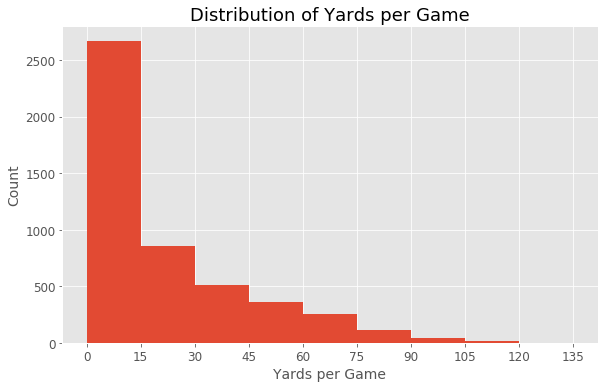

In [45]:
eda_viz_pre.ypg_distribution(savefig = True)

In [46]:
rec_stats[rec_stats['Y/G'] >= 120]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
2107,Calvin Johnson *+,DET,27,WR,16,16,204.0,122,59.8%,1964,16.1,5,92,53,9.6,7.6,122.8,3,2012


#### Fumbles
Fumbles display an inverse relationship, which is expected. However, there are several players with very high fumble numbers. Upon investigation however, many of the fumbles recorded were on special teams plays (e.g. punt returns). Therefore, including this statistic in this analysis will overly punish players asked to play special teams, and it might be cut from this dataset, as most players have negligible fumble counts anyways.

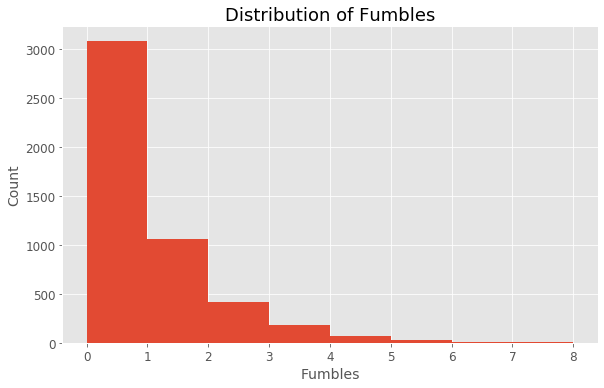

In [47]:
eda_viz_pre.fmb_distribution(savefig = True)

In [48]:
rec_stats[rec_stats['Fmb'] >= 6]

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,YEAR
134,Bobby Wade,2TM,24,NaN,14,1,29.0,14,48.3%,120,8.6,0,0,17,4.1,1.0,8.6,10,2005
696,Devin Hester*+,CHI,25,NaN,16,0,38.0,20,52.6%,299,15.0,2,11,81,7.9,1.3,18.7,7,2007
792,Chris Davis,TEN,23,NaN,12,0,9.0,5,55.6%,38,7.6,0,1,13,4.2,0.4,3.2,6,2007
1201,Davone Bess,MIA,24,NaN,16,2,113.0,76,67.3%,758,10.0,2,48,34,6.7,4.8,47.4,6,2009
1298,Josh Cribbs*+,CLE,26,WR,16,12,37.0,20,54.1%,135,6.8,1,4,35,3.6,1.3,8.4,6,2009
1390,Arnaz Battle,SFO,29,NaN,15,0,5.0,5,100.0%,40,8.0,0,2,12,8.0,0.3,2.7,6,2009
1596,Josh Cribbs,CLE,27,WR,15,5,39.0,23,59.0%,292,12.7,1,11,65,7.5,1.5,19.5,7,2010
1854,Preston Parker,TAM,24,NaN,16,0,65.0,40,61.5%,554,13.9,3,26,51,8.5,2.5,34.6,8,2011
1914,Tashard Choice,3TM,27,NaN,13,1,30.0,19,63.3%,124,6.5,0,0,18,4.1,1.5,9.5,6,2011
2069,Brandon Banks,WAS,24,NaN,16,0,1.0,1,100.0%,10,10.0,0,1,10,10.0,0.1,0.6,7,2011


## Advanced Receiver Stats Data
These advanced statistics (courtesy of Football Outsiders) for receivers will be used for the projections of second year jumps. They will need to be trimmed down to only the rookie and second year players for each year. (Note: a Glossary of this dataset's features is available in the reference section)

In [49]:
adv_stats.head()

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
0,S.Smith,CAR,502,508,29.0%,29.6%,1720,2/44,2005
1,C.Johnson,CIN,415,412,19.9%,19.7%,1648,3/58,2005
2,S.Moss,WAS,402,390,25.6%,24.4%,1450,4/51,2005
3,D.Driver,GB,355,323,17.1%,14.4%,1496,6/175,2005
4,E.Kennison,KC,343,343,27.6%,27.7%,1199,3/67,2005


### Feature Types
The typing is fairly reasonable, however both `DVOA` as well as `VOA` will need to be changed to floats. `DPI`, which is formatted in *number of penalties/yards*, will most likely need to be split up into two different columns. Additionally the `Player` column is formatted VERY differently from the other two datasets, going with a *firstinitial.lastname* format. This will most likely require the other datasets to be changed to this format, and instead of merging purely on name, merging on name and team.

In [50]:
adv_stats.dtypes

Player    object
Team      object
DYAR       int64
YAR        int64
DVOA      object
VOA       object
EYds       int64
DPI       object
YEAR       int64
dtype: object

### Missingness
There seem to be no missing entries for this dataset, which is in line with initial assumptions.

In [51]:
adv_stats.isnull().mean()

Player    0.0
Team      0.0
DYAR      0.0
YAR       0.0
DVOA      0.0
VOA       0.0
EYds      0.0
DPI       0.0
YEAR      0.0
dtype: float64

### Distribution of Categorical Features

#### Team
Team has a slightly different encoding than the other datasets, as well as being slightly inconsistent. When specifically comparing the encodings between this dataset and the previous two, it can be seen that some edits to the encodings will be required for certain teams.

In [52]:
adv_stats['Team'].nunique()

38

In [53]:
adv_stats['Team'].value_counts()

ARI     77
WAS     75
KC      75
CLE     75
CIN     75
GB      74
MIN     73
CHI     72
NYJ     72
PIT     71
PHI     71
SEA     71
SF      71
OAK     71
TEN     70
NYG     70
NO      70
DET     69
BUF     69
HOU     68
MIA     68
DEN     67
JAC     67
IND     67
ATL     65
NE      65
TB      65
BAL     64
CAR     63
DAL     63
STL     60
SD      50
2TM     36
LARM    10
JAX      8
LAR      8
LAC      8
LACH     4
Name: Team, dtype: int64

In [54]:
set(receivers['Tm']) - set(adv_stats['Team'])

{'GNB', 'KAN', 'NOR', 'NWE', 'SDG', 'SFO', 'TAM'}

In [55]:
set(adv_stats['Team']) - set(receivers['Tm'])

{'2TM', 'GB', 'JAC', 'KC', 'LACH', 'LARM', 'NE', 'NO', 'SD', 'SF', 'TB'}

### Distribution of Numeric Features

#### DYAR (Defense-adjusted Yards Above Replacement)
DYAR has a fairly normal distribution with a peak in the 0-100 bin. It has a few outliers at the high end, with star players such as Calvin Johnson, Jordy Nelson, Antonio Brown, and Michael Thomas, as well as others and two outliers on the low end in Tavon Austin and Chris Chambers. Each of these players also had very poor statistics in almost every other advanced metric as well.

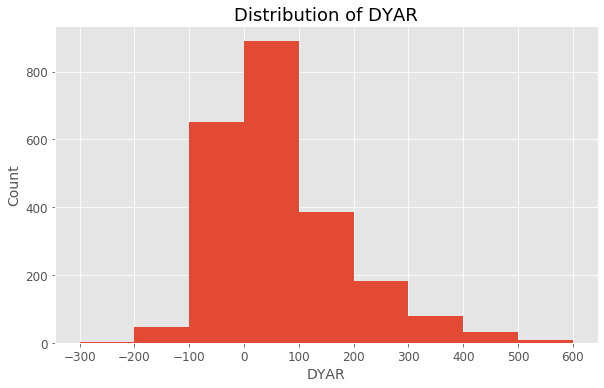

In [56]:
eda_viz_pre.dyar_distribution(savefig = True)

In [57]:
adv_stats[adv_stats['DYAR'] >= 500]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
0,S.Smith,CAR,502,508,29.0%,29.6%,1720,2/44,2005
142,M.Harrison,IND,513,491,30.6%,28.7%,1723,2/33,2006
279,R.Moss,NE,564,557,28.9%,28.4%,1935,6/72,2007
427,A.Johnson,HOU,510,480,23.5%,21.3%,1901,5/67,2008
854,C.Johnson,DET,570,577,31.9%,32.5%,1881,3/67,2011
855,J.Nelson,GB,517,525,52.5%,53.5%,1408,2/40,2011
1311,A.Brown,PIT,554,525,25.7%,23.7%,1992,5/97,2014
1470,A.Brown,PIT,517,490,19.7%,18.0%,2061,7/196,2015
2110,M.Thomas,NO,538,537,23.9%,23.8%,1993,3/46,2019


In [58]:
adv_stats[adv_stats['DYAR'] < -200]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
225,C.Chambers,MIA,-297,-312,-37.1%,-38.3%,551,0/0,2006
1726,T.Austin,LARM,-219,-199,-39.1%,-36.6%,352,2/43,2016


#### YAR (Yards Above Replacement)
YAR has a similarly shaped distribution as DYAR (with a peak again in the 0-100 bin), which is to be expected as it is essentially the same statistic, except not accounting for the defenses played. Something interesting to note, however, is that Tavon Austin does not appear as an extremely low outlier, as he most likely played fairly poorly, but his performance was even worse when taking into account his opponents. Instead, Brandon Lloyd is down around the bottom. There are similar high outliers, except that Marvin Harrison, Andre Johnson, and an Antonio Brown season don't appear, while a Randall Cobb season does.

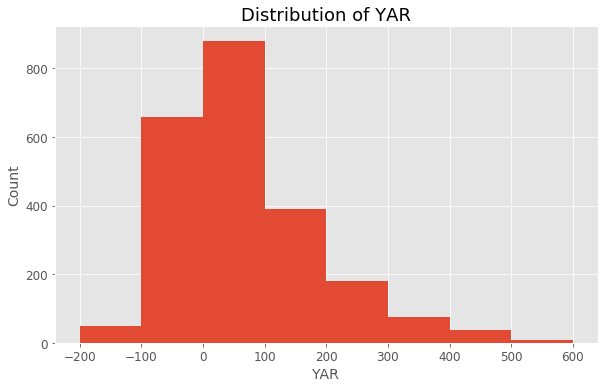

In [59]:
eda_viz_pre.yar_distribution(savefig = True)

In [60]:
adv_stats[adv_stats['YAR'] >= 500]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
0,S.Smith,CAR,502,508,29.0%,29.6%,1720,2/44,2005
279,R.Moss,NE,564,557,28.9%,28.4%,1935,6/72,2007
854,C.Johnson,DET,570,577,31.9%,32.5%,1881,3/67,2011
855,J.Nelson,GB,517,525,52.5%,53.5%,1408,2/40,2011
1311,A.Brown,PIT,554,525,25.7%,23.7%,1992,5/97,2014
1314,R.Cobb,GB,479,501,35.7%,37.8%,1514,1/44,2014
2110,M.Thomas,NO,538,537,23.9%,23.8%,1993,3/46,2019


In [61]:
adv_stats[adv_stats['YAR'] < -200]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
225,C.Chambers,MIA,-297,-312,-37.1%,-38.3%,551,0/0,2006


#### DVOA (Defense-adjusted Value Over Average)
DVOA displays a normal distribution (peak in the -10-0 bin), with outliers on both ends. On the upper end, there are receivers with seemingly small sample sizes (based on their EYds numbers), in Kelley Washington, Marvin Hall, and Greg Camarillo. On the lower end of the spectrum, Brandon Lloyd has the lowest DVOA, joined by Stanley Morgan. 

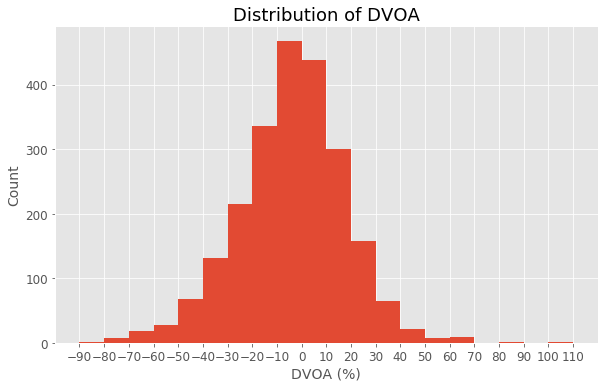

In [62]:
eda_viz_pre.dvoa_distribution(savefig = True)

In [63]:
adv_stats[pd.to_numeric(adv_stats['DVOA'].str.replace('%', '')) >= 80]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
372,G.Camarillo,MIA,72,76,81.6%,86.9%,168,0/0,2007
798,K.Washington,SD,96,97,80.7%,81.4%,226,0/0,2010
2197,M.Hall,DET,98,101,108.2%,112.1%,211,0/0,2019


In [64]:
adv_stats[pd.to_numeric(adv_stats['DVOA'].str.replace('%', '')) < -80]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
423,B.Lloyd,WAS,-59,-54,-85.6%,-79.3%,-21,0/0,2007
2268,S.Morgan,CIN,-53,-55,-82.5%,-86.1%,-16,0/0,2019


#### VOA (Value Over Average)
VOA follows the same distribution pattern as DVOA as expected (peak in the -20-0 bin), with slightly more spread, but with the same upper outliers as DVOA. However, in the lower outliers, in addition to Stanley Morgan, Donte Moncrief and Travis Benjamin also make an appearance, receivers with much larger names than Morgan. Brandon Lloyd is also not a lower outlier in this distribution.

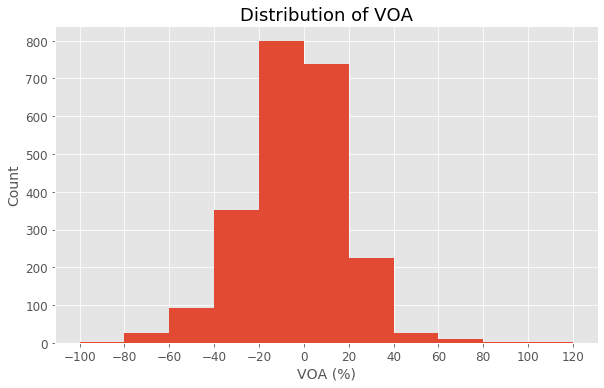

In [65]:
eda_viz_pre.voa_distribution(savefig = True)

In [66]:
adv_stats[pd.to_numeric(adv_stats['VOA'].str.replace('%', '')) >= 80]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
372,G.Camarillo,MIA,72,76,81.6%,86.9%,168,0/0,2007
798,K.Washington,SD,96,97,80.7%,81.4%,226,0/0,2010
2197,M.Hall,DET,98,101,108.2%,112.1%,211,0/0,2019


In [67]:
adv_stats[pd.to_numeric(adv_stats['VOA'].str.replace('%', '')) < -80]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
2268,S.Morgan,CIN,-53,-55,-82.5%,-86.1%,-16,0/0,2019
2270,D.Moncrief,PIT,-71,-89,-76.3%,-91.9%,-14,0/0,2019
2272,T.Benjamin,LAC,-84,-87,-78.9%,-81.5%,-21,0/0,2019


#### Effective Yards
EYds has an inverse distribution (peak in the 0-250 bin), with a very small amount of negative entries. In terms of outliers on the high end, elite receivers Antonio Brown and Calvin Johnson make an appearance.

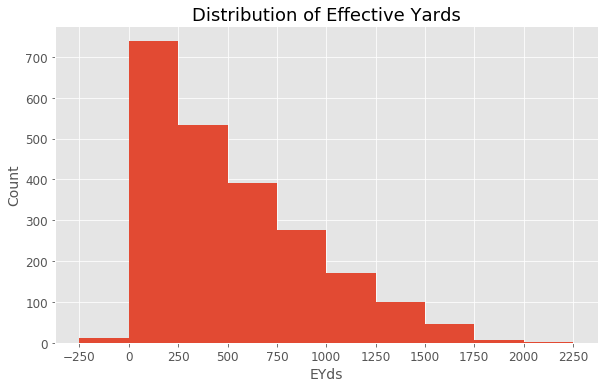

In [68]:
eda_viz_pre.eyds_distribution(savefig = True)

In [69]:
adv_stats[adv_stats['EYds'] >= 2000]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
1003,C.Johnson,DET,451,437,14.7%,13.8%,2008,5/102,2012
1470,A.Brown,PIT,517,490,19.7%,18.0%,2061,7/196,2015


In [70]:
adv_stats[adv_stats['EYds'] < 0]

,Player,Team,DYAR,YAR,DVOA,VOA,EYds,DPI,YEAR
423,B.Lloyd,WAS,-59,-54,-85.6%,-79.3%,-21,0/0,2007
989,C.Hall,PHI,-40,-36,-70.0%,-64.4%,-2,0/0,2011
994,C.Gates,MIA,-55,-57,-74.8%,-77.8%,-9,0/0,2011
1463,D.Archer,PIT,-45,-47,-74.0%,-75.8%,-7,0/0,2014
1469,D.Nelson,NYJ,-76,-71,-74.4%,-70.8%,-12,0/0,2014
1945,T.Austin,LARM,-99,-98,-68.2%,-67.9%,-1,0/0,2017
1947,B.Perriman,BAL,-158,-150,-71.8%,-68.6%,-16,0/0,2017
2268,S.Morgan,CIN,-53,-55,-82.5%,-86.1%,-16,0/0,2019
2270,D.Moncrief,PIT,-71,-89,-76.3%,-91.9%,-14,0/0,2019
2272,T.Benjamin,LAC,-84,-87,-78.9%,-81.5%,-21,0/0,2019
